**Dataset preparation:**

Importing necessary libraries


In [0]:
import numpy as np
import pandas as pd

Read data

In [0]:
sunrun_data=pd.read_csv('C:/Users/akshay koul/Desktop/New folder/Python/Sunrun_take_home.csv')

In [0]:
sunrun_data.head()

,Unnamed: 0,datetime,Meter 1 - kWh,Meter 2 - kWh,Meter 3 - kWh,Meter 4 - kWh
0,0,1/1/17 0:00,0.712120,0.0,7.44,0.712120
1,1,1/1/17 1:00,0.601273,0.0,7.44,0.601273
2,2,1/1/17 2:00,0.572490,0.0,7.44,0.572490
3,3,1/1/17 3:00,0.582209,0.0,7.44,0.582209
4,4,1/1/17 4:00,0.632759,0.0,7.44,0.632759


In [0]:
sunrun_data.rename({"Unnamed: 0":"extra"}, axis="columns", inplace=True)
sunrun_data.drop(["extra"], axis=1, inplace=True)

In [0]:
sunrun_data.dtypes

datetime          object
Meter 1 - kWh    float64
Meter 2 - kWh    float64
Meter 3 - kWh    float64
Meter 4 - kWh    float64
dtype: object

In [0]:
sunrun_data['datetime']=pd.to_datetime(sunrun_data['datetime'])

In [0]:
sunrun_data.dtypes

datetime         datetime64[ns]
Meter 1 - kWh           float64
Meter 2 - kWh           float64
Meter 3 - kWh           float64
Meter 4 - kWh           float64
dtype: object

In [0]:
sunrun_data = sunrun_data.set_index('datetime')

In [0]:
sunrun_data.head(3)

,Meter 1 - kWh,Meter 2 - kWh,Meter 3 - kWh,Meter 4 - kWh
datetime,,,,
2017-01-01 00:00:00,0.712120,0.0,7.44,0.712120
2017-01-01 01:00:00,0.601273,0.0,7.44,0.601273
2017-01-01 02:00:00,0.572490,0.0,7.44,0.572490


In [0]:
sunrun_data.index

DatetimeIndex(['2017-01-01 00:00:00', '2017-01-01 01:00:00',
               '2017-01-01 02:00:00', '2017-01-01 03:00:00',
               '2017-01-01 04:00:00', '2017-01-01 05:00:00',
               '2017-01-01 06:00:00', '2017-01-01 07:00:00',
               '2017-01-01 08:00:00', '2017-01-01 09:00:00',
               ...
               '2017-12-31 14:00:00', '2017-12-31 15:00:00',
               '2017-12-31 16:00:00', '2017-12-31 17:00:00',
               '2017-12-31 18:00:00', '2017-12-31 19:00:00',
               '2017-12-31 20:00:00', '2017-12-31 21:00:00',
               '2017-12-31 22:00:00', '2017-12-31 23:00:00'],
              dtype='datetime64[ns]', name='datetime', length=8760, freq=None)

In [0]:
# Adding columns with year, month, hour, and weekday name
sunrun_data['Year'] = sunrun_data.index.year
sunrun_data['Month'] = sunrun_data.index.month
sunrun_data['Weekday Name'] = sunrun_data.index.weekday_name
sunrun_data['Hour'] = sunrun_data.index.hour
sunrun_data.head(3)

,Meter 1 - kWh,Meter 2 - kWh,Meter 3 - kWh,Meter 4 - kWh,Year,Month,Weekday Name,Hour
datetime,,,,,,,,
2017-01-01 00:00:00,0.712120,0.0,7.44,0.712120,2017,1,Sunday,0
2017-01-01 01:00:00,0.601273,0.0,7.44,0.601273,2017,1,Sunday,1
2017-01-01 02:00:00,0.572490,0.0,7.44,0.572490,2017,1,Sunday,2


**To Label the dataset, I have assumed that Meter 1 corresponds to Solar generation reading, Meter 2 corresponds to Home Load, Meter 3 ~ Battery State of Charge, and  Meter 4 ~ Home Net Load**

In [0]:
sunrun_data.rename(columns={'Meter 1 - kWh':'solar_generation',
 'Meter 2 - kWh':'home_load', 'Meter 3 - kWh':'battery_state_of_charge', 'Meter 4 - kWh':'home_net_load'}, 
                 inplace=True)

..

**Labeled version of the dataset:**

In [0]:
sunrun_data.head(5)

,solar_generation,home_load,battery_state_of_charge,home_net_load,Year,Month,Weekday Name,Hour
datetime,,,,,,,,
2017-01-01 00:00:00,0.712120,0.0,7.44,0.712120,2017,1,Sunday,0
2017-01-01 01:00:00,0.601273,0.0,7.44,0.601273,2017,1,Sunday,1
2017-01-01 02:00:00,0.572490,0.0,7.44,0.572490,2017,1,Sunday,2
2017-01-01 03:00:00,0.582209,0.0,7.44,0.582209,2017,1,Sunday,3
2017-01-01 04:00:00,0.632759,0.0,7.44,0.632759,2017,1,Sunday,4


..

**Visualizations/Insights:**

In [0]:
import matplotlib.pylab as plt
import seaborn as sns

In [0]:
sns.set(rc={'figure.figsize':(11, 4)})

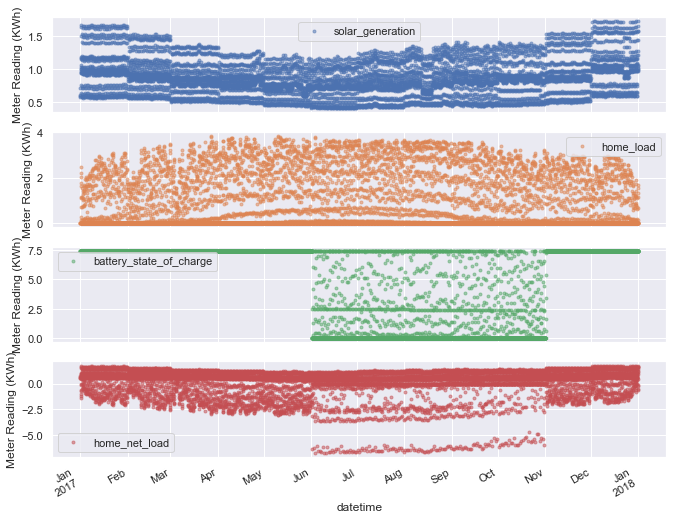

In [0]:
cols_plot = ['solar_generation', 'home_load', 'battery_state_of_charge','home_net_load']
axes = sunrun_data[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Meter Reading (KWh)')

**Some interesting patterns:**

**Meter reading for solar generation tends to be higher in winters which might be beacause of the fact that cool weather allows for a more even flow of electricity from the panels into the homes.**

**Solar generation meter reading appears to be split in three clusters- one with points scattered densely, centred around 0.65 KWh, one with points centred around 1 KWh and on with points centred around 1.5 KWh.**

**Home load appears to be higher in summers which could be because of increased solar power generated during that time.**

**Battery state of charge and home net load show a somewhat similar pattern i.e. almost stable throughout the whole year with a significant drop in the readings during Jul-Nov period.**

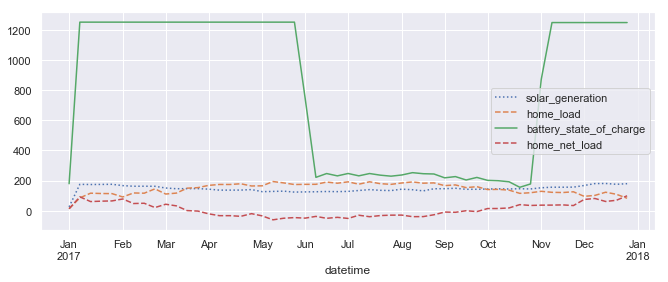

In [0]:
s_d=sunrun_data.iloc[:,:4]
weekly=s_d.resample('W').sum()
weekly.plot(style=[':','--','-','----'])

**Weekly pattern of all the readings together throughout the year**

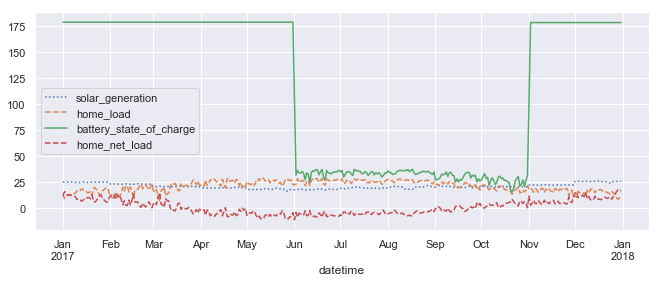

In [0]:
daily=s_d.resample('D').sum()
daily.plot(style=[':','--','-','----'])

**Daily pattern of all the readings together throughout the year**

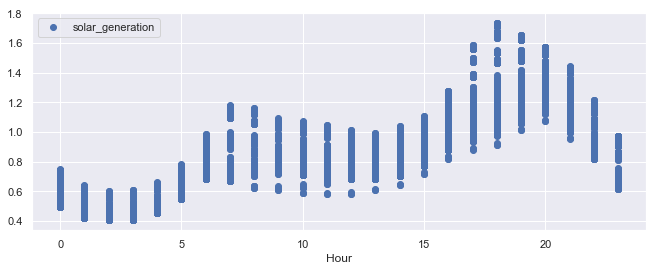

In [0]:
sunrun_data.plot(x='Hour', y='solar_generation', style='o')

**As we can see, solar generation is at it's peak during the afternoon time which could be due to the fact the most of the people are not at home during that time.**

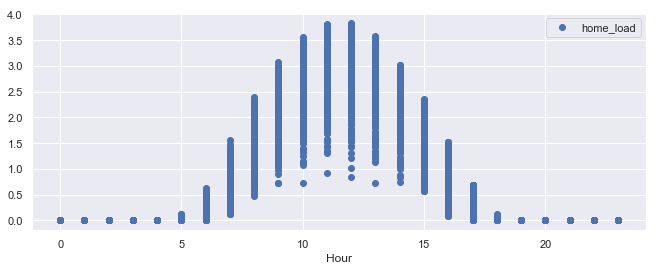

In [0]:
sunrun_data.plot(x='Hour', y='home_load', style='o')

**Home load by contrast, looks to be higher or is at its peak during the mornings.**

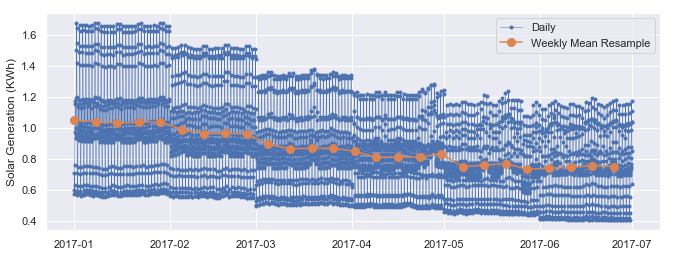

In [0]:
sunrun_data_mean = sunrun_data[['solar_generation']].resample('W').mean()

start, end = '2017-01', '2017-06'

fig1, ax1 = plt.subplots()

ax1.plot(sunrun_data.loc[start:end, 'solar_generation'],
marker='.', linestyle='-', linewidth=0.5, label='Daily')

ax1.plot(sunrun_data_mean.loc[start:end, 'solar_generation'],
marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')

ax1.set_ylabel('Solar Generation (KWh)')
ax1.legend();

**Plot of daily and weekly solar generation time series over a single six month period**

**Statistics:**

In [0]:
ss=sunrun_data.groupby('Hour')
s_mean=ss.mean()
s_mean

,solar_generation,home_load,battery_state_of_charge,home_net_load,Year,Month
Hour,,,,,,
0,0.602851,0.000000,4.318610,0.602851,2017.0,6.526027
1,0.514084,0.000000,4.318610,0.514084,2017.0,6.526027
2,0.487443,0.000000,4.318610,0.487443,2017.0,6.526027
3,0.491550,0.000000,4.318610,0.491550,2017.0,6.526027
4,0.537103,0.000000,4.318610,0.537103,2017.0,6.526027
5,0.656067,0.020714,4.318610,0.635870,2017.0,6.526027
6,0.827501,0.218579,4.318610,0.614386,2017.0,6.526027
7,0.909771,0.786265,4.406116,0.235761,2017.0,6.526027
8,0.889177,1.533342,4.771537,-0.219142,2017.0,6.526027


In [0]:
s1_mean=s_mean.drop(['Year', 'Month'],axis=1)

In [0]:
s1_mean

,solar_generation,home_load,battery_state_of_charge,home_net_load
Hour,,,,
0,0.602851,0.000000,4.318610,0.602851
1,0.514084,0.000000,4.318610,0.514084
2,0.487443,0.000000,4.318610,0.487443
3,0.491550,0.000000,4.318610,0.491550
4,0.537103,0.000000,4.318610,0.537103
5,0.656067,0.020714,4.318610,0.635870
6,0.827501,0.218579,4.318610,0.614386
7,0.909771,0.786265,4.406116,0.235761
8,0.889177,1.533342,4.771537,-0.219142


In [0]:
max(s1_mean['solar_generation'])

1.344867659402741

**The highest amount of average meter reading of solar generation is 0.77 during the evening period (around 7 PM).**

In [0]:
max(s1_mean['home_load'])

2.9605567148328777

**The highest amount of average meter reading of home load is 2.96 during the morning-afternoon period.**

In [0]:
max(s1_mean['battery_state_of_charge'])

7.406609249093128

**The highest amount of average meter reading of battery state of charge is 7.406 during the afternoon period.**

In [0]:
max(s1_mean['home_net_load'])

1.344867659402741

**The highest amount of average meter reading of home net load is 1.344 during the evening period (around 7 PM).**